<a href="https://colab.research.google.com/github/ranjan0601/Hotel_Booking_Analysis/blob/main/Hotel_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    

## Hotel Booking Analysis

# **Project Summary -**


This data Contains booking information about city hotel and resort hotel. It include information about booking date, length of stay, number of people etc. Explore and analyse the data that governs the important factor about booking.

##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Amit Ranjan **


# **GitHub Link -**

# https://github.com/ranjan0601/Hotel_Booking_Analysis.git

# **Problem Statement**

## 1 .What is the shape of data? What are there different columns and how many missing values are there in data?

## 2. What is the percentage of missing data of overall dataFaram?

## 3. Which is the maximum adr (Average daily rate)? And, it is of which hotel type? What is the max ADR in checkout catagory of reservation type

## 4. Maximum customer opted for which type of meal?

## 5. What is the averge ADR over the years?

## 6. Which are the Top 3 most frequently travelled country!!

## 7. Which are Top 10 most expensive country to travel??

## 8. What is the growth of ADR (Average daily rate) over the year?

## 9. What is the bifurcation of customer type based on hotels!! who is the most frequently visited customer type!!

## 10. What is the Top Active Company Code?

## 11. What is the Top Active Agent Code?

# ***Let's Begin !*** 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 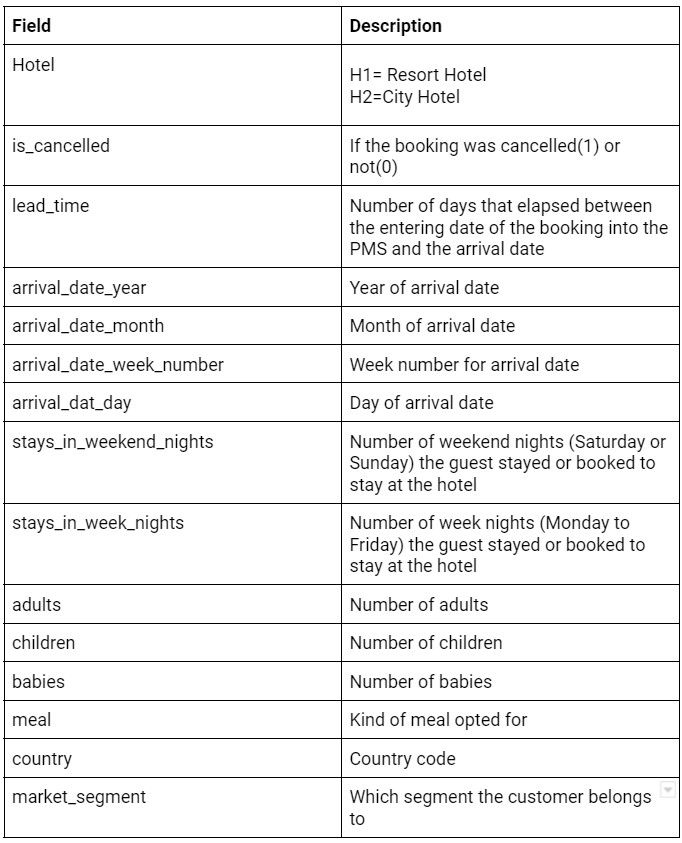

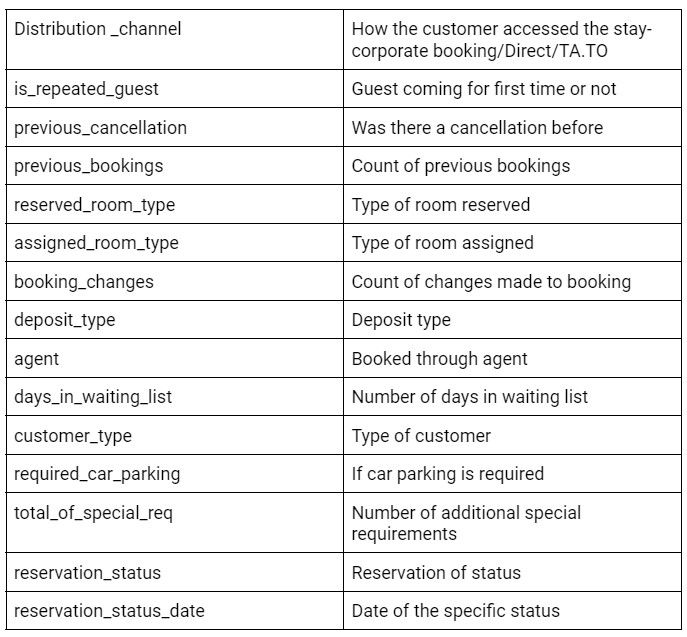

In [ ]:
path = '/content/drive/MyDrive/Almabatter/EDA_Project_Related/'

In [ ]:
hotel_df = pd.read_csv(path + 'Hotel Bookings.csv')

In [ ]:
meal_df = pd.read_csv('/content/drive/MyDrive/Almabatter/EDA_Project_Related/meal_meaning.csv')

In [ ]:
meal_df

,Term,Meaning
0,BB,Bead and Breakfast
1,FB,Full Board
2,HB,Half Board
3,SC,Self Catering
4,Undefined,Undefined


In [ ]:
# meal_df.to_csv('meal_df_new') 
'''Understanding the export part'''

## Understanding the data

## What is the shape of the datafaram?

In [ ]:
hotel_df.shape

(119390, 32)

## What are the different columns in the DataFrame?

In [ ]:
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
hotel_df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01


In [ ]:
hotel_df.describe(include = 'all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


In [ ]:
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## How many missing value are there in the DataFrame?

In [ ]:
# how may missing data in df
hotel_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

## How much %age of data is there in overall DataFrame!!

In [ ]:
round(100 *(hotel_df.isnull().sum()/hotel_df.shape[0]),2)

hotel                              0.00
is_canceled                        0.00
lead_time                          0.00
arrival_date_year                  0.00
arrival_date_month                 0.00
arrival_date_week_number           0.00
arrival_date_day_of_month          0.00
stays_in_weekend_nights            0.00
stays_in_week_nights               0.00
adults                             0.00
children                           0.00
babies                             0.00
meal                               0.00
country                            0.41
market_segment                     0.00
distribution_channel               0.00
is_repeated_guest                  0.00
previous_cancellations             0.00
previous_bookings_not_canceled     0.00
reserved_room_type                 0.00
assigned_room_type                 0.00
booking_changes                    0.00
deposit_type                       0.00
agent                             13.69
company                           94.31


In [ ]:
hotel_df['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

## Which is the maximum adr (Average daily rate)!!

---



In [ ]:
#Identify the maximum adr (average daily rate)
max_adr_df = hotel_df.loc[hotel_df['adr'].idxmax()]

In [ ]:
max_adr_df

hotel                                City Hotel
is_canceled                                   1
lead_time                                    35
arrival_date_year                          2016
arrival_date_month                        March
arrival_date_week_number                     13
arrival_date_day_of_month                    25
stays_in_weekend_nights                       0
stays_in_week_nights                          1
adults                                        2
children                                    0.0
babies                                        0
meal                                         BB
country                                     PRT
market_segment                    Offline TA/TO
distribution_channel                      TA/TO
is_repeated_guest                             0
previous_cancellations                        0
previous_bookings_not_canceled                0
reserved_room_type                            A
assigned_room_type                      

In [ ]:
max_adr_df['adr']

5400.0

## Maximum ADR in checkout Catagory?

In [ ]:
adr_checkout_cat = hotel_df[hotel_df['reservation_status']=='Check-Out']

In [ ]:
max_adr_checkout_cat = adr_checkout_cat.loc[adr_checkout_cat['adr'].idxmax()]

In [ ]:
# Max adr in checkout catogory
max_adr_checkout_cat[['adr', 'hotel']]

adr           510.0
hotel    City Hotel
Name: 111403, dtype: object

In [ ]:
adr_checkout_cat['lead_time'].max(),adr_checkout_cat['lead_time'].min(),adr_checkout_cat['lead_time'].mean()

(737, 0, 79.98468722560732)

## Understanding Reservation type wise ADR!

In [ ]:
reservation_type_wise_adr = hotel_df.groupby('reservation_status')['adr'].mean().reset_index()

In [ ]:
reservation_type_wise_adr

,reservation_status,adr
0,Canceled,105.205241
1,Check-Out,99.987693
2,No-Show,96.378459


Text(0, 0.5, 'Mean ADR')

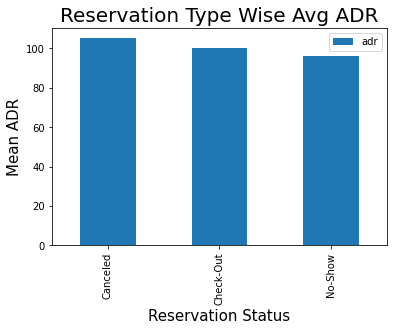

In [ ]:
reservation_type_wise_adr.set_index('reservation_status').plot(kind = 'bar')
plt.title('Reservation Type Wise Avg ADR', fontsize = 20)
plt.xlabel('Reservation Status', fontsize=15)
plt.ylabel('Mean ADR', fontsize=15)

## What is the average ADR in checkout catagory?

In [ ]:
print(f'Average adr in checkout catagory is {reservation_type_wise_adr[1:2]}')

Average adr in checkout catagory is   reservation_status        adr
1          Check-Out  99.987693


In [ ]:
hotel_df['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [ ]:
hotel_df['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

## Maximum customer opted for which type of meal?



In [ ]:
hotel_df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [ ]:
hotel_df = pd.merge(hotel_df, meal_df, how = 'left', left_on='meal', right_on='Term')

In [ ]:
hotel_df.drop('Term', axis =1 , inplace = True)

In [ ]:
hotel_df.head(2)

In [ ]:
hotel_df['Meaning'].value_counts().sort_values(ascending = False)

Bead and Breakfast    92310
Half Board            14463
Self Catering         10650
Undefined              1169
Full Board              798
Name: Meaning, dtype: int64

In [ ]:
print('Maximum customer opted for Bread & Buttter meal option')

Maximum customer opted for Bread & Buttter meal option


In [ ]:
# Identifying lead time unique, Max and Min
hotel_df['lead_time'].nunique(), hotel_df['lead_time'].max(), hotel_df['lead_time'].min()

(479, 737, 0)

## What is the averge ADR over the years?

In [ ]:
#Identify the mean of adr
round(hotel_df['adr'].mean(),3)

101.831

## Which are the Top 3 most frequently travelled country!!

In [ ]:
# Which county is the most travelled
hotel_df['country'].value_counts().reset_index().sort_values(by = 'country', ascending = False).head(3)

,index,country
0,PRT,48590
1,GBR,12129
2,FRA,10415


In [ ]:
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'Meaning'],
      dtype='object')

## Top 10 most costly country to travel !!

In [ ]:
#Identify country-wise mean of adr
country_wise_mean_adr = hotel_df.groupby('country')['adr'].mean().reset_index().sort_values(by = 'adr' , ascending = False).rename(columns = {'adr' : 'mean_adr'})

In [ ]:
country_wise_mean_adr.head(10)

,country,mean_adr
44,DJI,273.000000
2,AIA,265.000000
4,AND,202.652857
167,UMI,200.000000
93,LAO,181.665000
118,MYT,177.750000
120,NCL,175.500000
60,GEO,169.015909
36,COM,165.305000
57,FRO,155.200000


Text(0, 0.5, 'Mean ADR')

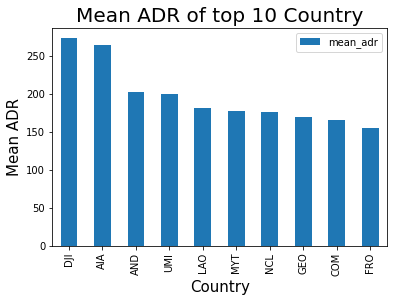

In [ ]:
country_wise_mean_adr.head(10).set_index('country').plot(kind = 'bar')
plt.title('Mean ADR of top 10 Country', fontsize=20)
plt.xlabel('Country', fontsize=15)
plt.ylabel('Mean ADR', fontsize=15)

In [ ]:
from datetime import datetime
from datetime import date

In [ ]:
hotel_df['reservation_status_date_2'] = hotel_df['reservation_status_date'].apply(lambda x : datetime.strptime(x,'%Y-%m-%d'))

In [ ]:
def convert_to_year(date):
  return date.year

In [ ]:
hotel_df['year_of_booking_newcol'] = hotel_df['reservation_status_date_2'].apply(convert_to_year)

In [ ]:
#Lets check the output
country_wise_non_na_df = hotel_df[(~hotel_df['country'].isna())]

In [ ]:
country_wise_non_na_df.shape

(118902, 35)

In [ ]:
# Need to understand Country wise, Year wise average adr
Country_wise_year_wise_avg_adr = hotel_df.groupby(['country','year_of_booking_newcol'], as_index=False).agg({'adr':'mean'}).rename(columns = {'country': 'Country', 'year_of_booking_newcol': 'Year_of_booking', 'adr' : 'mean_adr'})

In [ ]:
Country_wise_year_wise_avg_adr.head(10)

,Country,Year_of_booking,mean_adr
0,ABW,2016,157.680000
1,ABW,2017,99.000000
2,AGO,2015,106.884200
3,AGO,2016,114.806068
4,AGO,2017,126.455094
5,AIA,2016,265.000000
6,ALB,2015,86.445000
7,ALB,2016,81.058333
8,ALB,2017,88.250000
9,AND,2016,163.666667


In [ ]:
df_top_10_country_by_mean_adr = country_wise_non_na_df[country_wise_non_na_df['country'].str.contains("DJI|AIA|AND|UMI|LAO|MYT|NCL|GEO|COM|FRO")][['year_of_booking_newcol','country', 'adr','reservation_status' ]]

In [ ]:
#Making a date column by combining date-month and year column
hotel_df['Date_of_registration']=hotel_df.apply(lambda x:'%s-%s-%s' % (x['arrival_date_year'],x['arrival_date_month'], x['arrival_date_day_of_month']),axis=1)

In [ ]:
type(hotel_df['reservation_status_date'])

pandas.core.series.Series

## Show the trend of total average ADR over the year!!

In [ ]:
Price_analysis_overl_all_year = Country_wise_year_wise_avg_adr.sort_values(by = ['Year_of_booking', 'Country', 'mean_adr'], ascending= [True,True,False])

In [ ]:
Total_avg_adr_over_years = Price_analysis_overl_all_year.groupby('Year_of_booking', as_index=False)['mean_adr'].mean()

In [ ]:
Total_avg_adr_over_years.sort_index(inplace=True)

Text(0, 0.5, 'mean_adr')

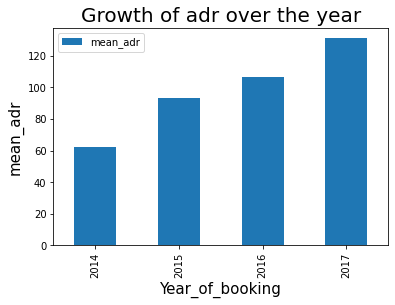

In [ ]:
Total_avg_adr_over_years.set_index('Year_of_booking').plot(kind = 'bar')
plt.title('Growth of adr over the year', fontsize = 20)
plt.xlabel('Year_of_booking', fontsize = 15)
plt.ylabel('mean_adr', fontsize= 15)

In [ ]:
price_analysis_in_2017 = Price_analysis_overl_all_year.loc[Price_analysis_overl_all_year['Year_of_booking'] == 2017]

In [ ]:
price_analysis_in_2017

,Country,Year_of_booking,mean_adr
1,ABW,2017,99.000000
4,AGO,2017,126.455094
8,ALB,2017,88.250000
10,AND,2017,231.892500
12,ARE,2017,145.183125
...,...,...,...
384,UZB,2017,99.250000
387,VEN,2017,132.750000
390,VNM,2017,132.410000
393,ZAF,2017,128.409211


Text(0, 0.5, 'Mean ADR')

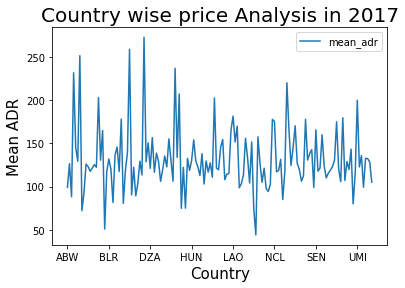

In [ ]:
price_analysis_in_2017[['Country','mean_adr']].set_index('Country').plot()
plt.title("Country wise price Analysis in 2017", fontsize=20)
plt.xlabel("Country", fontsize=15)
plt.ylabel("Mean ADR", fontsize=15)

## What is the bifurcation of customer type based on hotels!! who is the most frequently visited customer type!!

Text(0, 0.5, 'Number of Bookings')

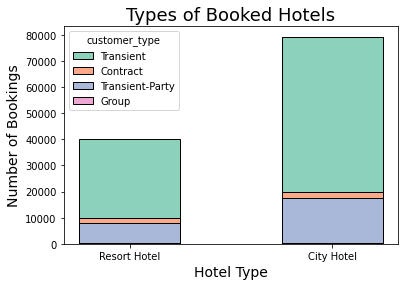

In [ ]:
sns.histplot(data = hotel_df, x = "hotel",palette = "Set2", hue = "customer_type", multiple = "stack", shrink = 0.5)
plt.title("Types of Booked Hotels", fontsize = 18)
plt.xlabel("Hotel Type", fontsize = 14)
plt.ylabel("Number of Bookings", fontsize = 14)

Text(0, 0.5, 'Customer Type')

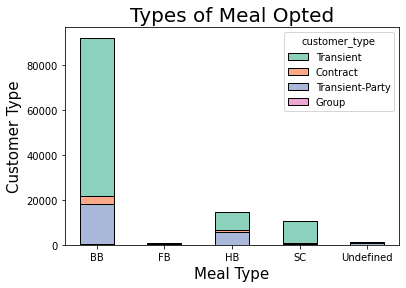

In [ ]:
sns.histplot(data = hotel_df, x = "meal",palette = "Set2", hue = "customer_type", multiple = "stack", shrink = 0.5)
plt.title("Types of Meal Opted", fontsize = 20)
plt.xlabel("Meal Type", fontsize=15)
plt.ylabel("Customer Type", fontsize=15)

In [ ]:
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'Meaning',
       'reservation_status_date_2', 'year_of_booking_newcol',
       'Date_of_registration'],
      dtype='object')

In [ ]:
hotel_df['country'].unique(), hotel_df['country'].nunique()

(array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
        'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
        'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
        'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
        'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
        'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
        'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
        'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
        'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
        'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
        'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
        'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
        'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
        'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
  

In [ ]:
non_na_company = hotel_df[~hotel_df['company'].isna()]

In [ ]:
non_na_company.shape

(6797, 36)

## What is the Top Active Company Code?

In [ ]:
#Top Active Company Code
non_na_company['company'].value_counts().reset_index().sort_values(by="company", ascending= False).head(3)

,index,company
0,40.0,927
1,223.0,784
2,67.0,267


Text(336.9714285714286, 0.5, 'Company')

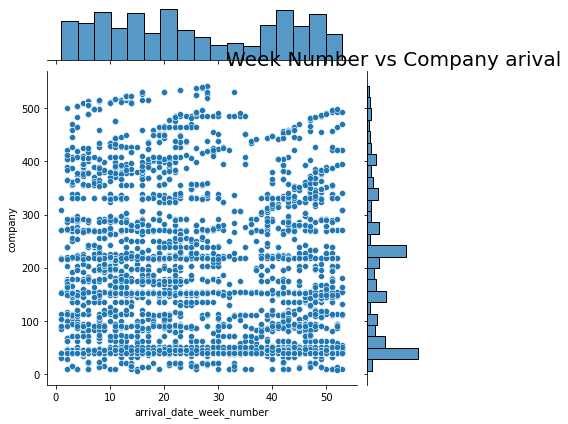

In [ ]:
sns.jointplot(x='arrival_date_week_number', y= 'company', data=non_na_company)
plt.title("Week Number vs Company arival", fontsize=20)
plt.xlabel("Week Number", fontsize=15)
plt.ylabel("Company", fontsize=15)

## What is the Top Active Agent code?

In [ ]:
non_na_agent = hotel_df[~hotel_df['agent'].isna()]

In [ ]:
non_na_agent.shape

(103050, 36)

In [ ]:
#Top Active agent code
non_na_agent['agent'].value_counts().reset_index().sort_values(by='agent',ascending= False).head(3)

,index,agent
0,9.0,31961
1,240.0,13922
2,1.0,7191


Text(336.9714285714286, 0.5, 'Agent')

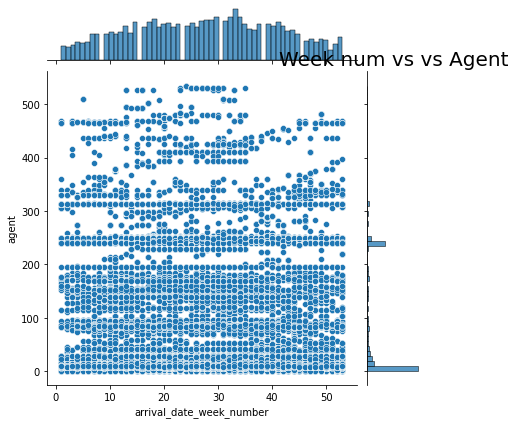

In [ ]:
sns.jointplot(x='arrival_date_week_number', y= 'agent', data=non_na_agent)
plt.title("Week num vs vs Agent", fontsize=20)
plt.xlabel("Week Number", fontsize=15)
plt.ylabel("Agent", fontsize=15)